In [2]:
using Catalyst, Latexify, CSV, Plots

include("./Util.jl")
include("./Reaction.jl")
include("./Network.jl")
include("./NetworkModel.jl")
include("./Rates.jl")

reactionsFilepath = "input/reactions.csv"
speciesFilepath = "input/species.csv"

reactionsData = CSV.read(reactionsFilepath)
speciesData = CSV.read(speciesFilepath)

,name,mass,natoms
,String,Int64,Int64
1,H,1,1
2,H+,1,1
3,H2,2,2
4,H2+,2,2
5,H3+,3,3
6,C,12,1
7,C+,12,1
8,CH,13,2
9,CH+,13,2


In [3]:
ICs = InitialConditions(.001, 2.6e-4,4.6e-4,6.1e-5)
T=1. 
zeta = 1.0
F_UV=1.
A_v=1.
p = Parameters(zeta, 0.4, 0.3, T, F_UV, A_v, 0.2, 0.5)

Parameters(1.0, 0.4, 0.3, 1.0, 1.0, 1.0, 0.2, 0.5)

In [4]:
calculateRates!(reactionsData, p)
filterReactionData!(reactionsData, speciesData["name"])
ENV["COLUMNS"] = 500
reactionsData[1:3,:]

,re1,re2,re3,prod1,prod2,prod3,prod4,alpha,beta,gamma,tmin,tmax,rate
,String,String,Float64,String,String,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,C,CRP,NaN,C+,E-,NAN,NaN,2.3e-17,0.0,0.0,10.0,41000.0,2.3e-17
2,CO,CRP,NaN,CO+,E-,NAN,NaN,3.9e-17,0.0,0.0,10.0,41000.0,3.9e-17
3,H2,CRP,NaN,H+,H,E-,NaN,2.86e-19,0.0,0.0,10.0,41000.0,2.86e-19


In [44]:
#using Catlab.Graphics.Graphviz
#g = Graph(network)

In [5]:
network = createNetworkModel(reactionsData, speciesData["name"])

u0 = createU0(ICs, network)
tspan = (0.0, 10000.0)
system = convert(ODESystem, network)
lat = latexify(system)
display("text/latex",lat)

In [7]:
using Plots, DifferentialEquations

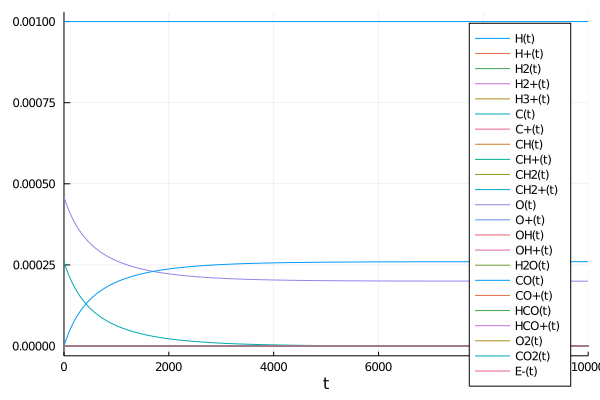

In [12]:
prob = ODEProblem(system, u0, tspan)
sol = solve(prob, TRBDF2(), saveat = 10.)

plot(sol)

In [13]:
plot(log(sol.u))

LoadError: MethodError: no method matching log(::Array{Array{Float64,1},1})
Closest candidates are:
  log(!Matched::BigFloat) at mpfr.jl:656
  log(!Matched::Float16) at math.jl:1144
  log(!Matched::Missing) at math.jl:1197
  ...

In [ ]:
using NeuralPDE, Flux

sol2 = solve(prob,nnode(10),dt=1/10,iterations=10)
plot(sol,plot_analytic=true)

┌ Info: Precompiling NeuralNetDiffEq [8faf48c0-8b73-11e9-0e63-2155955bfa4d]
└ @ Base loading.jl:1278
